# Decision Trees

## For Classification

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # for Decision Tree Classifier
from sklearn.model_selection import train_test_split # for train_test_split function
from sklearn import metrics #for accuracy calculation 
from sklearn.metrics import classification_report, confusion_matrix # confusion matrix for classification
%matplotlib inline

# for plotting & saving trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Importing data from the local system
https://www.kaggle.com/uciml/pima-indians-diabetes-database?resource=download#

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
classf = pd.read_csv("https://raw.githubusercontent.com/avmolotova/mpt/main/diabetes.csv")
classf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
classf = pd.read_csv("diabetes.csv")

In [ ]:
classf.shape
# 768 records, 9 attributes

(768, 9)

In [ ]:
classf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
##сделайте здесь дескриптивки сами!!1

In [ ]:
# selecting predictors and outcome vars
predictors = ['Pregnancies', 'Glucose', 'BMI', 'Age','Glucose']
X = classf[predictors] # predictors
y = classf.Outcome # outcome

In [ ]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=999) #80/20

In [ ]:
# training 
classifier = DecisionTreeClassifier(random_state=999)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=999, splitter='best')

In [ ]:
# predicting
y_pred = classifier.predict(X_test)

In [ ]:
# evaluating
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 46 are misclassified

[[74 27]
 [26 27]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       101
           1       0.50      0.51      0.50        53

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.66      0.66       154



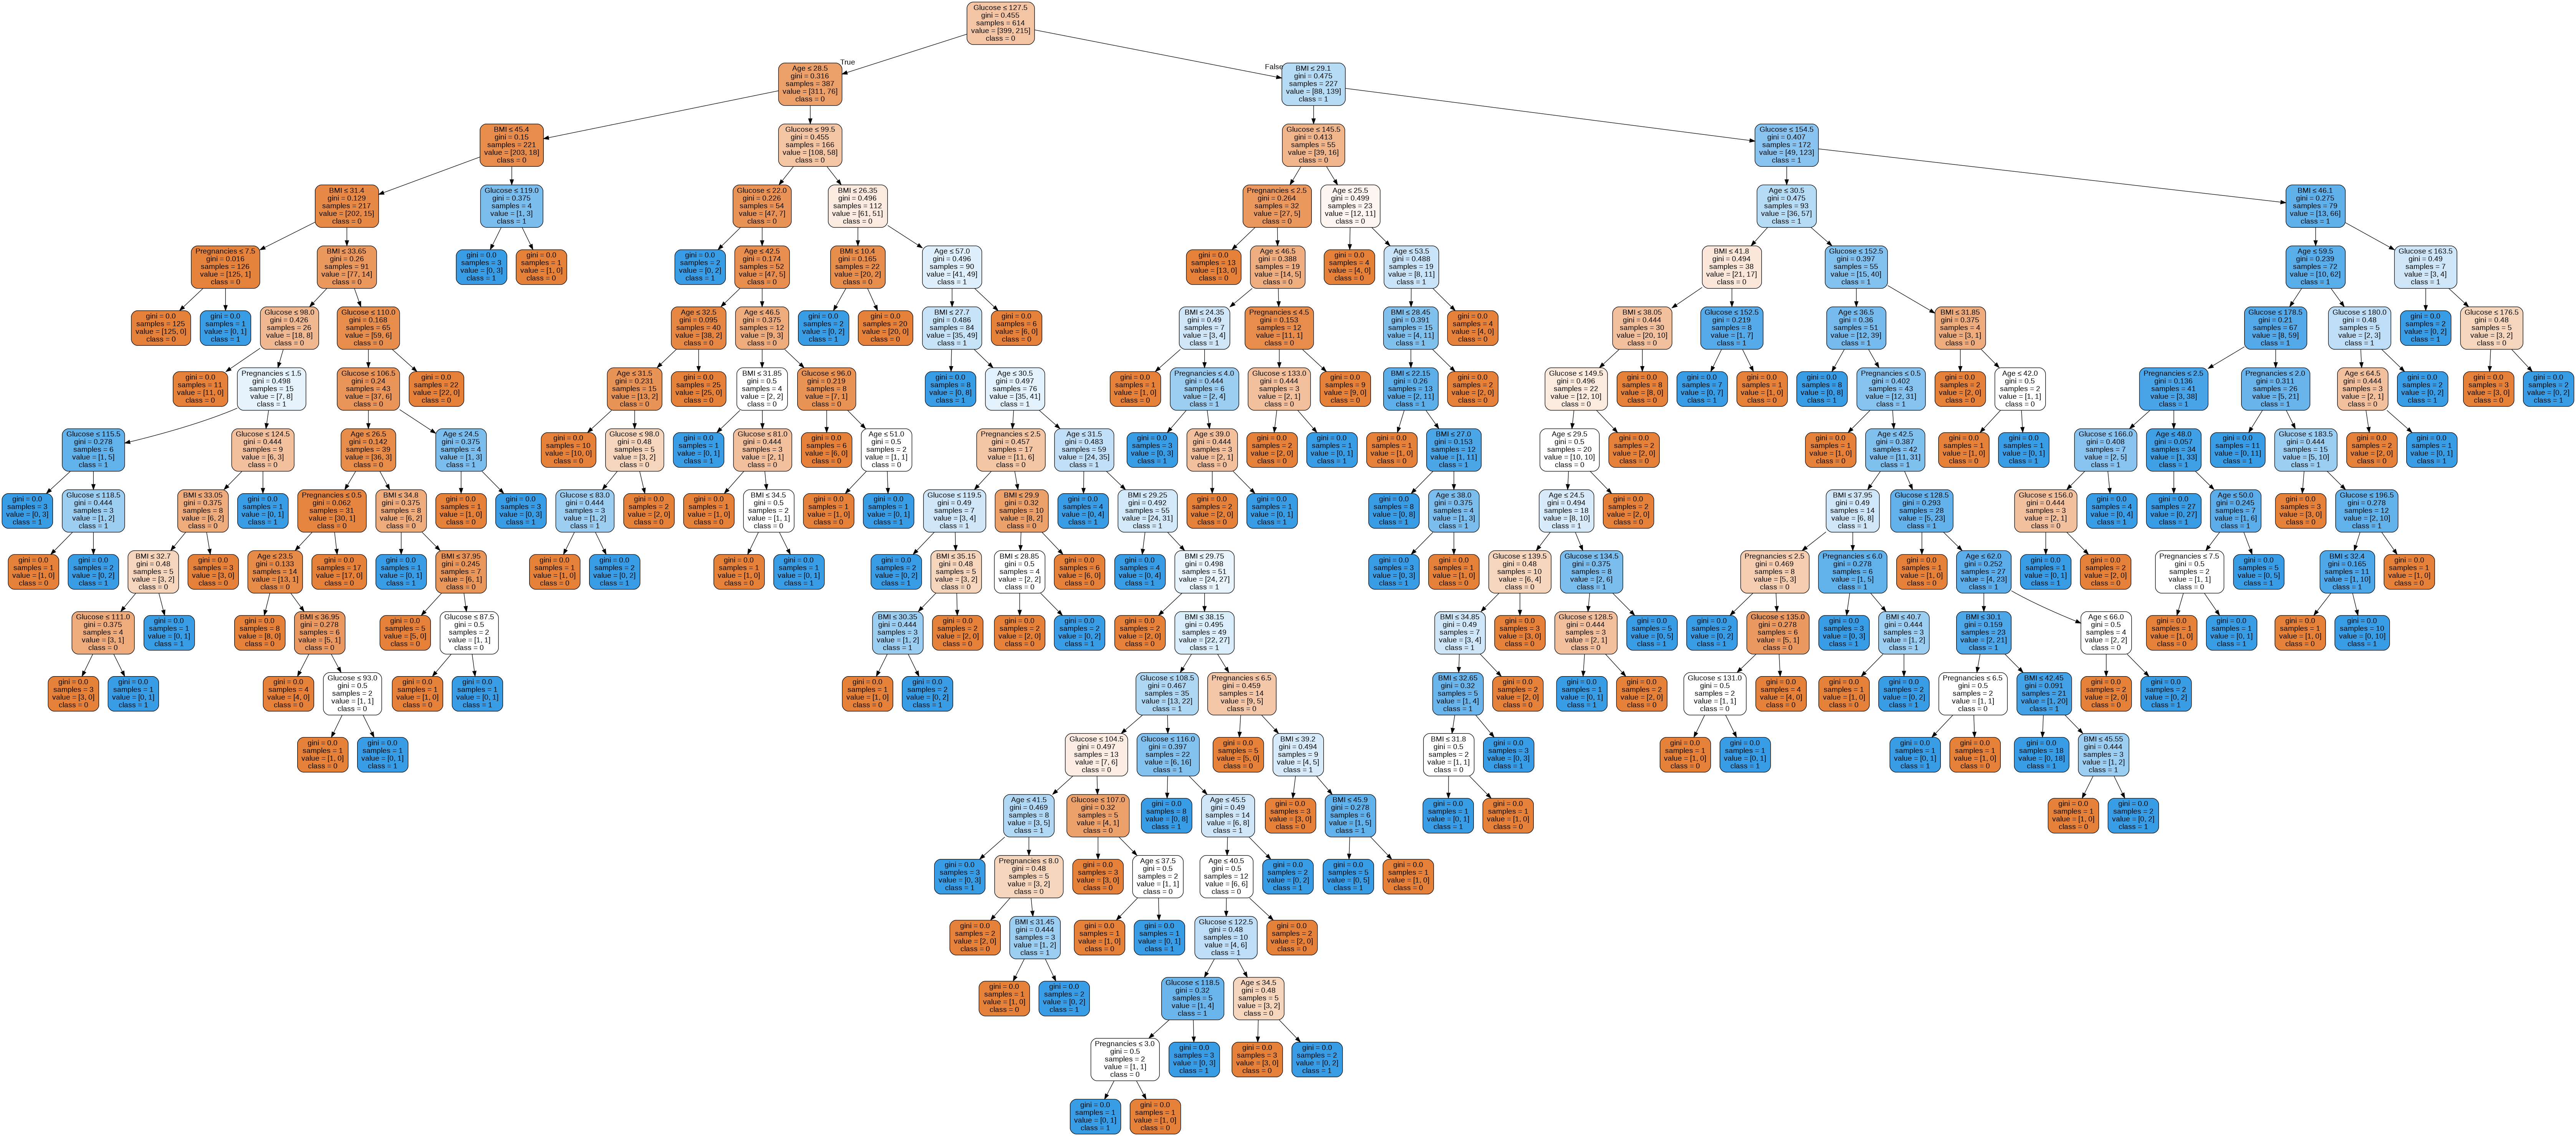

In [ ]:
# visualizing
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictors,class_names=['0','1']) #converts a decision tree classifier into a dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  # convert the dot file to png or displayable form on Jupyter.
graph.write_png('diabetes.png')
Image(graph.create_png())

# GINI = impurity of the node. You can say a node is pure when all of its records belong to the same class

### Optimizing trees

будем резать, товарищи

In [ ]:
# criterion = attribute selection measure. Default = "gini" (for Gini index), can change to “entropy” for the information gain
# splitter= to choose the split strategy. Default = "best", can change to “random” to choose the best random split 
# max_depth(int) = maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. 

classifier_pruned = DecisionTreeClassifier(splitter="random", max_depth=3, random_state=999)

# Train Decision Tree Classifer
classifier_pruned = classifier_pruned.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = classifier_pruned.predict(X_test)

In [ ]:
# evaluating
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 44 are misclassified

[[86 15]
 [22 31]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       101
           1       0.67      0.58      0.63        53

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.76       154



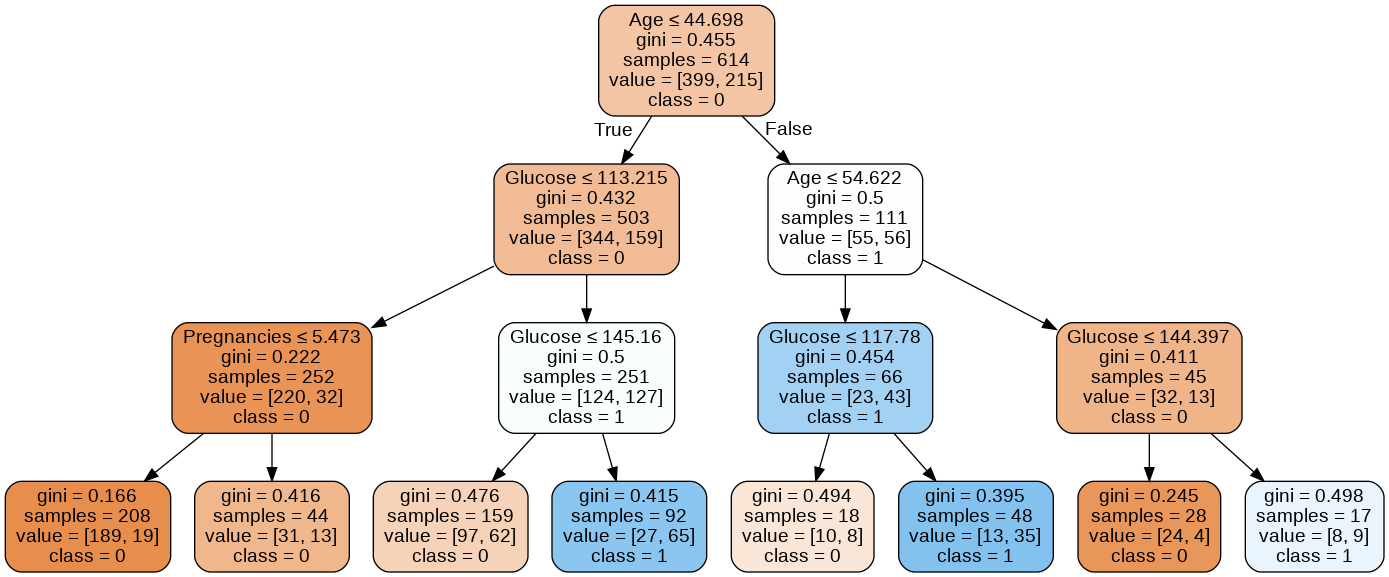

In [ ]:
dot_data = StringIO()
export_graphviz(classifier_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = predictors,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## For regression

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

New dataset: https://drive.google.com/file/d/1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_/view

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


In [ ]:
regr = pd.read_csv("https://raw.githubusercontent.com/avmolotova/mpt/main/petrol_consumption.csv")

In [ ]:
#regr = pd.read_csv("petrol_consumption.csv")

In [ ]:
regr.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
# one more way to divide data into predictors and outcome
X = regr.drop('Petrol_Consumption', axis=1)
y = regr['Petrol_Consumption']

In [ ]:
# dividing into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# training
regressor = DecisionTreeRegressor(random_state=99)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=99, splitter='best')

In [ ]:
#testing
y_pred = regressor.predict(X_test)

In [ ]:
# смотрим на код как умные парни в метро
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,631.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


In [ ]:
#evaluating
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 57.0
Mean Squared Error: 6335.6
Root Mean Squared Error: 79.59648233433435


# Logistic Regression

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

обязательно посмотрите: здесь делают даммис, борются с имбэлэнсд классами

In [ ]:
#libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Опять новые данные, ура (ладно, вы уже их сто раз видели)

https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_cleaned.csv to bank_cleaned.csv


In [ ]:
logreg = pd.read_csv("https://raw.githubusercontent.com/avmolotova/mpt/main/bank_cleaned.csv")

In [ ]:
#logreg = pd.read_csv("bank_cleaned.csv")

In [ ]:
classf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
classf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Таск 1: сколько наблюдений в нашей зависимой переменной по категориям?

In [ ]:
classf['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
count_no_sub = len(classf[classf['Outcome']==0])
count_sub = len(classf[classf['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no diab is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of diab", pct_of_sub*100)

percentage of no diab is 65.10416666666666
percentage of diab 34.89583333333333


Таск 2: Дайте саммэри по каждой категории (по средним значениям)

In [ ]:
classf.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# selecting predictors and outcome vars
predictors = ['Pregnancies', 'Glucose', 'BMI', 'Age','BloodPressure', "SkinThickness", "Insulin", "DiabetesPedigreeFunction"]
X = classf[predictors] # predictors
y = classf.Outcome # outcome

In [ ]:
# делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
# что-то делаем с несбалансированной выборкой с помощью SMOTE
## Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
## Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

X = classf.loc[:, classf.columns != 'Outcome']
y = classf.loc[:, classf.columns == 'Outcome']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

length of oversampled data is  786
Number of no subscription in oversampled data 393
Number of subscription 393
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# RFE

classf_vars=classf.columns.values.tolist()
y=['Outcome']
X=[i for i in classf_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Model 1
X=os_data_X[predictors]
y=os_data_y['Outcome']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.630122
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.091     
Dependent Variable:    Outcome            AIC:                1006.5516 
Date:                  2020-12-04 10:49   BIC:                1043.8872 
No. Observations:      786                Log-Likelihood:     -495.28   
Df Model:              7                  LL-Null:            -544.81   
Df Residuals:          778                LLR p-value:        1.6740e-18
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1053   0.0273  3.8587 0

In [ ]:
# убираем из-за p-value
cols=['Pregnancies', 'Glucose', 'BloodPressure'] 
X=os_data_X[cols]
y=os_data_y['Outcome']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.633971
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.085     
Dependent Variable: Outcome          AIC:              1002.6018 
Date:               2020-12-04 10:51 BIC:              1016.6027 
No. Observations:   786              Log-Likelihood:   -498.30   
Df Model:           2                LL-Null:          -544.81   
Df Residuals:       783              LLR p-value:      6.3060e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.0934   0.0231  4.0450 0.0001  0.0482  0.1387
Glucose            0.0153   0.0021  7.2795 0.0000  0.0112  0.0194


In [ ]:
#fitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# interpreting
odds_ratio=np.exp(logreg.coef_)

print(odds_ratio)

[[1.13953691 1.0385982  0.99446149]]


In [ ]:
# predicting
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68        83
           1       0.65      0.64      0.64        75

    accuracy                           0.66       158
   macro avg       0.66      0.66      0.66       158
weighted avg       0.66      0.66      0.66       158



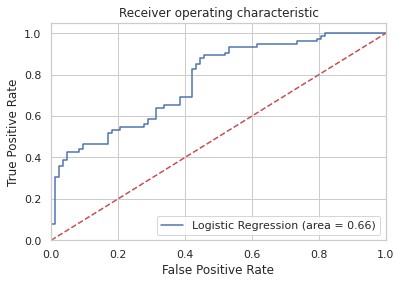

In [ ]:
# ROC

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# The dotted line represents the ROC curve of a purely random classifier
# a good classifier stays as far away from that line as possible (toward the top-left corner)

# вау интерактивчики

## плотли

возьмем данные о персонажах звездных войнов https://www.kaggle.com/jsphyg/star-wars

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/avmolotova/mpt/main/characters.csv")
data.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human


In [ ]:
data.shape

(87, 10)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(x=data["mass"], y=data["height"])
fig.show()

или вау даже в более привычном нам синтаксисе

In [ ]:
fig = px.scatter(data, x="mass", y="height")
fig.show()

интересно, что в первом случае у нас оси выглядят как *х* и *у*, а во втором оси подписываются названиями колонок

In [ ]:
datagen = data.dropna(subset=['gender']) #убираем НА из колонки гендер
datagen

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human
5,Owen Lars,178.0,120,"brown, grey",light,blue,52BBY,male,Tatooine,Human
6,Beru Whitesun lars,165.0,75,brown,light,blue,47BBY,female,Tatooine,Human
...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


In [ ]:
fig = px.scatter(datagen, x="mass", y="height", color = "gender")
fig.show()

основные графики и как их вызывать:



*   линия `line`
*   барчарт `bar`
*   пай `pie`
*   усы `box`
*   рассеевание `scatter`
*  гистограма `histogram`



**задание**

порисуйте графики

In [ ]:
dataeye = data["eye_color"]

In [ ]:
fig = px.bar(datagen, x='eye_color', color = "gender")
fig.show()

In [ ]:
df = data.groupby('gender').nunique()
df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,homeworld,species
gender,,,,,,,,,
female,19,12,8,6,10,7,7,11,7
hermaphrodite,1,1,1,0,1,1,1,1,1
male,62,34,30,9,21,12,27,42,31
none,2,1,1,1,2,2,1,0,1


In [ ]:
fig = px.pie(df, values='name', names='name')
fig.show()